# Imports

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
# model
from sklearn.ensemble import RandomForestClassifier
# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Load Data

In [2]:
dataset = load_iris(as_frame=True)

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([item.shape for item in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(84, 4), (28, 4), (38, 4), (84,), (28,), (38,)]


# Preview

In [8]:
print(dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
139,6.9,3.1,5.4,2.1
0,5.1,3.5,1.4,0.2
47,4.6,3.2,1.4,0.2
80,5.5,2.4,3.8,1.1


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

Analysis the missing values and unique values

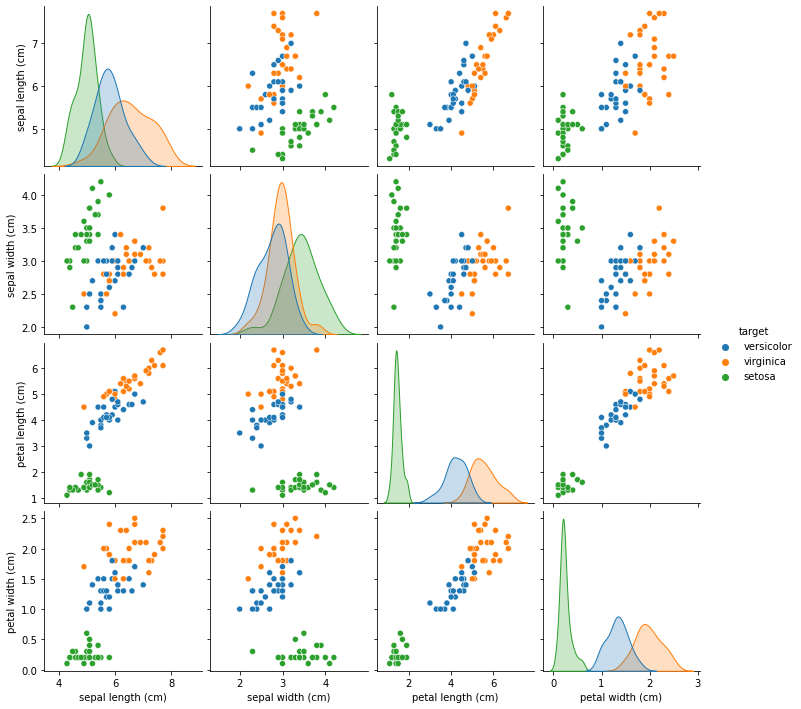

In [11]:
sns.pairplot(X_train.join(y_train.apply(lambda x: dataset['target_names'][x])), hue='target')

In [12]:
def show_missing_info(data):
    data = pd.DataFrame(data)
    return pd.DataFrame({
        'isnull': data.isnull().sum(),
        'nunique': data.nunique(),
        'dtypes': data.dtypes,
    })

In [13]:
show_missing_info(X_train)

,isnull,nunique,dtypes
sepal length (cm),0,33,float64
sepal width (cm),0,22,float64
petal length (cm),0,38,float64
petal width (cm),0,22,float64


# Model

In [14]:
model = RandomForestClassifier(n_estimators=100)

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

In [17]:
print(f'Validation Accuracy: {val_acc:.2%}')

Validation Accuracy: 92.86%


# Evaluation 

In [18]:
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [19]:
print(f'Test Accuracy: {test_acc:.2%}')

Test Accuracy: 100.00%


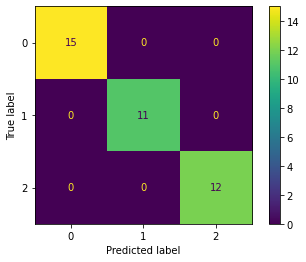

In [20]:
plot_confusion_matrix(model, X_test, y_test)

# Application

In [21]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    print(X_test.iloc[idx])
    names = dataset['target_names']
    forecasted = model.predict(X_test.iloc[idx:idx+1])[0]
    actual = y_test.iloc[idx]
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted} ({names[forecasted]})')
    print(f'\nActual data should be {actual} ({names[actual]})')

In [22]:
application()

Collected new features as follows:
sepal length (cm)    7.7
sepal width (cm)     2.6
petal length (cm)    6.9
petal width (cm)     2.3
Name: 118, dtype: float64

CORRECT

Model forecasted as 2 (virginica)

Actual data should be 2 (virginica)
